## Import relevant libraries 

In [5]:
import warnings
warnings.filterwarnings("ignore")
import os
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D, Dropout, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns

## Apply CNN Model with 7 Layers with Image Augmentation

In [6]:
# Reference: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator 
# Reference: https://stackoverflow.com/questions/53037510/can-flow-from-directory-get-train-and-validation-data-from-the-same-directory-in

# generate batches of tensor image data with real-time data augmentation

datagen=ImageDataGenerator(rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        validation_split=0.2)

train_generator = datagen.flow_from_directory(
    "/OCT2017 /train",
    target_size = (224, 224),
    batch_size=128,
    class_mode = "categorical",
    subset="training")

validation_generator = datagen.flow_from_directory(
    "/OCT2017 /train",
    target_size = (224, 224),
    batch_size=128,
    class_mode = "categorical",
    subset="validation")

Found 66788 images belonging to 4 classes.
Found 16696 images belonging to 4 classes.


In [7]:
tf.keras.backend.clear_session()

In [8]:
# Reference: https://keras.io/api/layers/convolution_layers/convolution2d/
# Reference: https://keras.io/api/layers/normalization_layers/batch_normalization/
# Reference: https://keras.io/api/layers/pooling_layers/max_pooling2d/
# Reference: https://keras.io/api/layers/regularization_layers/dropout/
# Reference: https://keras.io/api/layers/pooling_layers/global_average_pooling2d/
# Reference: https://keras.io/api/layers/core_layers/dense/


input_shape = (224,224,3)

# Input Layer
Input_Layer = Input(shape=(input_shape))

# Convolutional Layer
First_Conv2D = Conv2D(32, kernel_size = (3, 3), activation="relu",padding = 'same')(Input_Layer)
# Batch Normalization
First_BatchNormalization = BatchNormalization()(First_Conv2D)

# Convolutional Layer
Second_Conv2D = Conv2D(32, kernel_size = (3, 3), activation="relu",padding = 'same')(First_BatchNormalization)
# Batch Normalization
Second_BatchNormalization = BatchNormalization()(Second_Conv2D)

# MaxPool Layer
maxpool = MaxPooling2D(pool_size=(2,2))(Second_BatchNormalization)
# Dropout Layer
dropout = Dropout(rate=0.2)(maxpool)

# Convolutional Layer
Third_Conv2D = Conv2D(64, kernel_size = (3, 3), activation="relu",padding = 'same')(dropout)
# Batch Normalization
Third_BatchNormalization = BatchNormalization()(Third_Conv2D)

# Convolutional Layer
Fourth_Conv2D = Conv2D(64, kernel_size = (3, 3), activation="relu",padding = 'same')(Third_BatchNormalization)
# Batch Normalization
Fourth_BatchNormalization = BatchNormalization()(Fourth_Conv2D)

# MaxPool Layer
maxpool = MaxPooling2D(pool_size=(2,2))(Fourth_BatchNormalization)
# Dropout Layer
dropout = Dropout(rate=0.2)(maxpool)

# Convolutional Layer
Fifth_Conv2D = Conv2D(128, kernel_size = (3, 3), activation="relu",padding = 'same')(dropout)
# Batch Normalization
Fifth_BatchNormalization = BatchNormalization()(Fifth_Conv2D)

# Convolutional Layer
Sixth_Conv2D = Conv2D(128, kernel_size = (3, 3), activation="relu",padding = 'same')(Fifth_BatchNormalization)
# Batch Normalization
Sixth_BatchNormalization = BatchNormalization()(Sixth_Conv2D)

# MaxPool Layer
maxpool = MaxPooling2D(pool_size=(2,2))(Sixth_BatchNormalization)
# Dropout Layer
dropout = Dropout(rate=0.2)(maxpool)

# Convolutional Layer
Seventh_Conv2D = Conv2D(256, kernel_size = (3, 3), activation="relu",padding = 'same')(dropout)
# Batch Normalization
Seventh_BatchNormalization = BatchNormalization()(Seventh_Conv2D)

# GlobalAveragePooling Layer
global_average_pool = GlobalAveragePooling2D()(Seventh_BatchNormalization)

# Dense Layer
Output_Layer = Dense(4, activation="softmax")(global_average_pool)

# Creating a model
model2 = Model(inputs=Input_Layer,outputs=Output_Layer)

In [9]:
model2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 224, 224, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 32)      9248      
                                                                 
 batch_normalization_1 (Batc  (None, 224, 224, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0     

In [10]:
earlystop = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=5, verbose=1)

# Creating model2_with_augmentation_save folder before running the code.
filepath="model2_with_augmentation_save/weights-{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_accuracy',verbose=1, save_best_only=True, mode='max')

# Callbacks
optimizer = tf.keras.optimizers.Adam()
model2.compile(optimizer=optimizer,loss="categorical_crossentropy",metrics=["accuracy"])

# Creating a list with all the callbacks we want
callback_list = [earlystop, checkpoint]

train_samples = 66788
validation_samples = 16696
batch_size = 128
model2.fit(train_generator, validation_data= validation_generator, steps_per_epoch=train_samples//batch_size, callbacks=callback_list, epochs=50)

Epoch 1/50
521/521 [==============================] - ETA: 0s - loss: 0.4440 - accuracy: 0.8405
Epoch 1: val_accuracy improved from -inf to 0.73664, saving model to model2_with_augmentation_save/weights-01-0.7366.hdf5
521/521 [==============================] - 1241s 2s/step - loss: 0.4440 - accuracy: 0.8405 - val_loss: 0.8730 - val_accuracy: 0.7366
Epoch 2/50
521/521 [==============================] - ETA: 0s - loss: 0.2231 - accuracy: 0.9235
Epoch 2: val_accuracy improved from 0.73664 to 0.92651, saving model to model2_with_augmentation_save/weights-02-0.9265.hdf5
521/521 [==============================] - 1159s 2s/step - loss: 0.2231 - accuracy: 0.9235 - val_loss: 0.2186 - val_accuracy: 0.9265
Epoch 3/50
521/521 [==============================] - ETA: 0s - loss: 0.1888 - accuracy: 0.9362
Epoch 3: val_accuracy improved from 0.92651 to 0.93256, saving model to model2_with_augmentation_save/weights-03-0.9326.hdf5
521/521 [==============================] - 1146s 2s/step - loss: 0.1888 - 

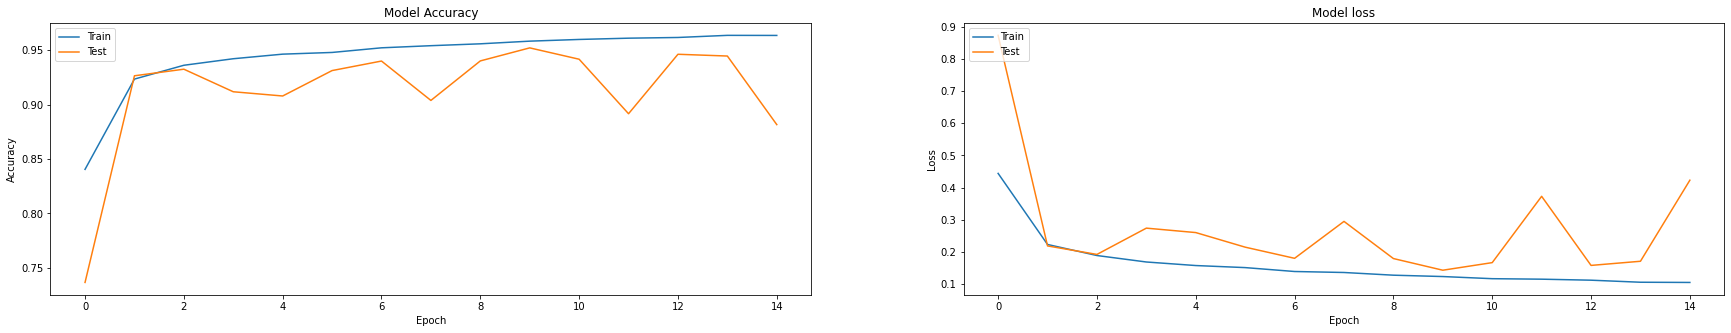

In [11]:
# Plot training & validation acc values
plt.figure(figsize=(30, 5))
plt.subplot(121)
plt.plot(model2.history.history['accuracy'])
plt.plot(model2.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(122)
plt.plot(model2.history.history['loss'])
plt.plot(model2.history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

In [14]:
# Accuracy on test dataset

test_generator = datagen.flow_from_directory(
    "/OCT2017 /test",
    target_size = (224, 224),
    batch_size=128,
    class_mode = "categorical",
    shuffle = False)
test_samples = 968
batch_size = 128

result = model2.evaluate(test_generator, steps = test_samples // batch_size+1, verbose = 1)
print("Accuracy on Test Dataset:{0}, Loss on Test Dataset: {1}".format(result[1]*100,result[0]))

Found 968 images belonging to 4 classes.
8/8 [==============================] - 13s 2s/step - loss: 0.1103 - accuracy: 0.9638
Accuracy on Test Dataset:96.38429880142212, Loss on Test Dataset: 0.11026882380247116


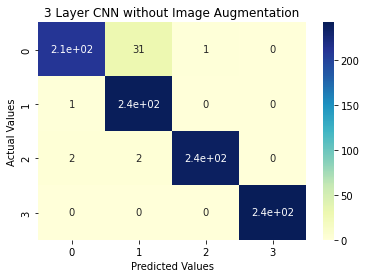

In [15]:
# Plot Confusion Matrix

# predicted values
y_pred = model2.predict(test_generator, test_samples // batch_size+1)
predicted_values = np.argmax(y_pred, axis=1)

confusionmatrix = confusion_matrix(test_generator.classes,predicted_values)
plt.title("7 Layer CNN without Image Augmentation")
sns.heatmap(confusionmatrix, annot=True, cmap="YlGnBu")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

**Observations**

We are getting an accuracy of 0.96 on the test dataset using 7 Layers CNN Model with Image Augmentation.